In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK


In [3]:
!pip3 install citipy
!pip3 install gmaps

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
# Import the dependencies:
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import requests
import time
import timeit
from citipy import citipy
from config import appid, g_key
from datetime import datetime
from scipy.stats import linregress

In [5]:
# Create an empty list to hold the weather data:
city_data = []

# Print the beginning of the logging:
print("Beginning Data Retrieval:                         ")
print("--------------------------------------------------")

# Create counters:
record_count = 1
set_count = 1

Beginning Data Retrieval:                         
--------------------------------------------------


In [6]:
# Create a set of random latitude and longitude combinations:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list:
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities:
cities = []

# Identify the nearest city for each latitude and longitude combination:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list:
    if city not in cities:
        cities.append(city)
        
# Print the city count to confimr sufficient count:
len(cities)

616

In [9]:
# for i, item in enumerate(list):

In [10]:
city_data_df = pd.read_csv("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/world-weather-analysis/Module 6/World Weather Analysis/weather_data/city_data_df.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Barrow,71.2906,-156.7887,-20.18,69,0,6.91,US,2022-02-02 17:22:47
1,Manono,-7.3000,27.4167,71.01,96,100,3.06,CD,2022-02-02 17:22:54
2,Punta Arenas,-53.1500,-70.9167,53.71,66,75,10.36,CL,2022-02-02 17:22:55
3,Beringovskiy,63.0500,179.3167,-2.20,84,43,19.33,RU,2022-02-02 17:22:55
4,Yellowknife,62.4560,-114.3525,-35.72,78,40,6.91,CA,2022-02-02 17:19:10


In [11]:
# Extract relevant fields from the DataFrame for plotting:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

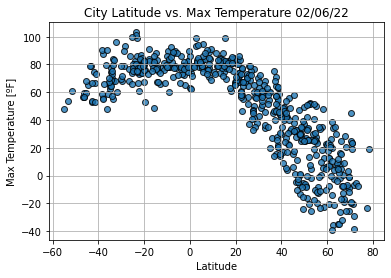

In [12]:
# Build the scattr plot for latitude vs. max temperature:
plt.scatter(lats,
            max_temps,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature [ºF]")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/world-weather-analysis/Module 6/World Weather Analysis/weather_data/Fig1.png")

# Show plot:
plt.show()

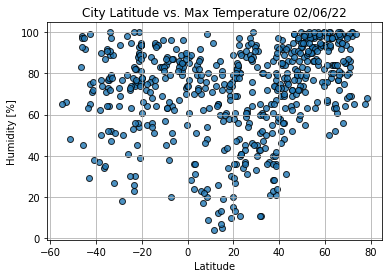

In [13]:
# Build the scattr plot for latitude vs. humidity:
plt.scatter(lats,
            humidity,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Humidity [%]")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/world-weather-analysis/Module 6/World Weather Analysis/weather_data/Fig2.png")

# Show plot:
plt.show()

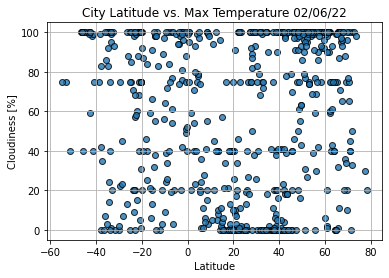

In [14]:
# Build the scattr plot for latitude vs. cloudiness:
plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Cloudiness [%]")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/world-weather-analysis/Module 6/World Weather Analysis/weather_data/Fig3.png")

# Show plot:
plt.show()

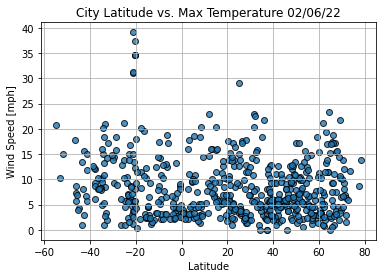

In [15]:
# Build the scattr plot for latitude vs. cloudiness:
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties:
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Wind Speed [mph]")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("/Users/diegoperezo97/Documents/Tecnológico de Monterrey – Data Analytics Boot Camp/world-weather-analysis/Module 6/World Weather Analysis/weather_data/Fig4.png")

# Show plot:
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data:
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept:
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line:
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line:
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation:
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

row = df.loc[row_index]

In [17]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                    47.82
Humidity                       65
Cloudiness                     75
Wind Speed                  20.71
Country                        AR
Date          2022-02-02 17:19:55
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

City_ID
0       True
1      False
2      False
3       True
4       True
       ...  
578     True
579    False
580    False
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [19]:
# Create Northern and Southern Hemisphere Dataframes:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

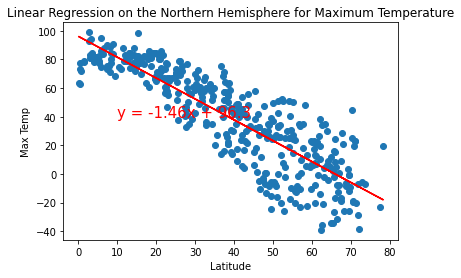

In [20]:
# Linear regression on the Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature",
                       "Max Temp", (10, 40))

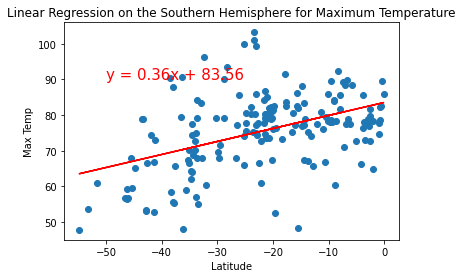

In [21]:
# Linear regression on the Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature",
                       "Max Temp", (-50, 90))

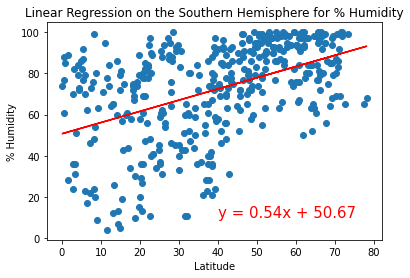

In [22]:
# Linear regression on the Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Humidity",
                       "% Humidity", (40, 10))

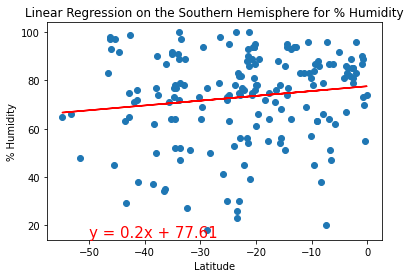

In [23]:
# Linear regression on the Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Humidity",
                       "% Humidity", (-50, 15))

In [24]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Barrow,71.2906,-156.7887,-20.18,69,0,6.91,US,2022-02-02 17:22:47
3,Beringovskiy,63.0500,179.3167,-2.20,84,43,19.33,RU,2022-02-02 17:22:55
4,Yellowknife,62.4560,-114.3525,-35.72,78,40,6.91,CA,2022-02-02 17:19:10
7,Kapaa,22.0752,-159.3190,67.12,83,100,1.01,US,2022-02-02 17:22:46
8,Grindavik,63.8424,-22.4338,30.15,63,40,11.50,IS,2022-02-02 17:22:57


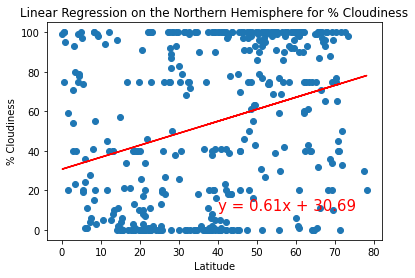

In [25]:
# Linear regression on the Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Cloudiness",
                       "% Cloudiness", (40, 10))

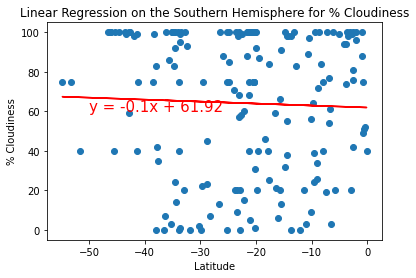

In [26]:
# Linear regression on the Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for % Cloudiness",
                       "% Cloudiness", (-50, 60))

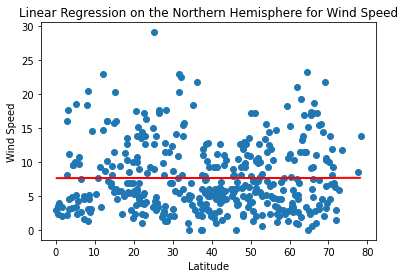

In [27]:
# Linear regression on the Northern Hemisphere:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Wind Speed",
                       "Wind Speed", (40, 35))

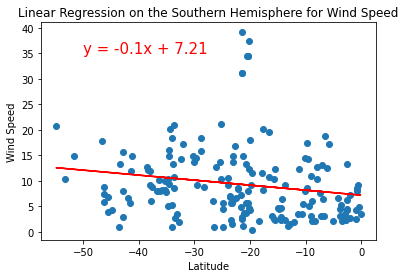

In [28]:
# Linear regression on the Southern Hemisphere:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function:
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed",
                       "Wind Speed", (-50, 35))